Nota: Os caminhos para os arquivos foram ocultados em razão da privacidade.
Note: The file paths were hidden due to maintain the privacy.

# Instalando e importando as bibliotecas necessárias

In [ ]:
# instalando a biblioteca para acessar a GCP através do Colab
!pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 51.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=2351af9dff7cf41e6c609e9492962c1efeb817523c6e91045dfc42d4f8b5754e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.1 MB/s 


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from google.cloud import storage
import os
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.window import Window
import pyspark.sql.functions as F
from pyspark.sql.types import NullType
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt

# Conectando à bucket na GCP e lendo cada arquivo

In [ ]:
#KEY do Service Account da GCP
serviceAccount = '/content/certificado.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('nome_da_bucket')
bucket.blob('D.SDA.PDA.005.CAT.202201.csv')
path = 'gs://caminho_do_arquivo/D.SDA.PDA.005.CAT.202201.csv'

In [ ]:
# Lendo o arquivo CSV a partir da bucket
df1 = pd.read_csv('gs://caminho_do_arquivo/D.SDA.PDA.005.CAT.202201.csv', sep = ';', encoding = 'ISO-8859-1')

In [ ]:
client = storage.Client()
bucket = client.get_bucket('nome_da_bucket')
bucket.blob('D.SDA.PDA.005.CAT.202204.csv')
path = 'gs://caminho do arquivo/D.SDA.PDA.005.CAT.202204.csv'

In [ ]:
df2 = pd.read_csv('gs://caminho_do_arquivo/D.SDA.PDA.005.CAT.202204.csv', sep = ';', encoding = 'ISO-8859-1')

In [ ]:
client = storage.Client()
bucket = client.get_bucket('nome_da_bucket')
bucket.blob('D.SDA.PDA.005.CAT.202210.csv')
path = 'gs://caminho_do_arquivo/D.SDA.PDA.005.CAT.202210.csv'

In [ ]:
df3 = pd.read_csv('gs://caminho_do_arquivo/D.SDA.PDA.005.CAT.202210.csv', sep = ';', encoding = 'ISO-8859-1')

# Pandas

## Unindo os 3 Dfs em um único DF consolidado

### Verificando as colunas de cada DF

In [ ]:
# Verificando as colunas do df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152140 entries, 0 to 152139
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Agente  Causador  Acidente   152140 non-null  object
 1   Data Acidente                152140 non-null  object
 2   CBO                          152140 non-null  object
 3   CID-10                       152140 non-null  object
 4   CNAE2.0 Empregador           152140 non-null  int64 
 5   CNAE2.0 Empregador.1         152140 non-null  object
 6   Emitente CAT                 152140 non-null  object
 7   Espécie do benefício         152140 non-null  object
 8   Filiação Segurado            152140 non-null  object
 9   Indica Óbito Acidente        152140 non-null  object
 10  Munic Empr                   152140 non-null  object
 11  Natureza da Lesão            152140 non-null  object
 12  Origem de Cadastramento CAT  152140 non-null  object
 13  Parte Corpo At

In [ ]:
# Verificando as colunas do df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89602 entries, 0 to 89601
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Agente  Causador  Acidente   89602 non-null  object
 1   Data Acidente                89602 non-null  object
 2   CBO                          89602 non-null  object
 3   CID-10                       89602 non-null  object
 4   CNAE2.0 Empregador           89602 non-null  int64 
 5   CNAE2.0 Empregador.1         89602 non-null  object
 6   Emitente CAT                 89602 non-null  object
 7   Espécie do benefício         89602 non-null  object
 8   Filiação Segurado            89602 non-null  object
 9   Indica Óbito Acidente        89602 non-null  object
 10  Munic Empr                   89602 non-null  object
 11  Natureza da Lesão            89602 non-null  object
 12  Origem de Cadastramento CAT  89602 non-null  object
 13  Parte Corpo Atingida         89

In [ ]:
# Verificando as colunas do df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15659 entries, 0 to 15658
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Agente  Causador  Acidente   15659 non-null  object
 1   Data Acidente                15659 non-null  object
 2   CBO                          15659 non-null  object
 3   CID-10                       15659 non-null  object
 4   CNAE2.0 Empregador           15659 non-null  int64 
 5   CNAE2.0 Empregador.1         15659 non-null  object
 6   Emitente CAT                 15659 non-null  object
 7   Espécie do benefício         15659 non-null  object
 8   Filiação Segurado            15659 non-null  object
 9   Indica Óbito Acidente        15659 non-null  object
 10  Munic Empr                   15659 non-null  object
 11  Natureza da Lesão            15659 non-null  object
 12  Origem de Cadastramento CAT  15659 non-null  object
 13  Parte Corpo Atingida         15

### Consolidando os DFs

In [ ]:
# Utilizando a função concat() para unir os 3 DFs
df = pd.concat([df1,df2,df3])

In [ ]:
# Verificando a união dos DFs
df.head()

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,{ñ class},2022/01,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
1,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
2,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
3,"Aprision. Em, Sobre ou Entre Dois ou Mai",2022/02,514205-Coletor Lixo,S60.0 Contusao de Dedos s/Lesao da Unha,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Goiás,2022/02,0000/00,24/02/2022,19/09/1986,01/03/2022,00.000.000.000.000
4,Impacto de Pes. Contra Objeto em Movimento,2022/01,{ñ class},S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/01,0000/00,28/01/2022,25/07/1995,01/03/2022,00.000.000.000.000


In [ ]:
# Verificando o total de linhas do df
df.count()

Agente  Causador  Acidente     257401
Data Acidente                  257401
CBO                            257401
CID-10                         257401
CNAE2.0 Empregador             257401
CNAE2.0 Empregador.1           257401
Emitente CAT                   257401
Espécie do benefício           257401
Filiação Segurado              257401
Indica Óbito Acidente          257401
Munic Empr                     257401
Natureza da Lesão              257401
Origem de Cadastramento CAT    257401
Parte Corpo Atingida           257401
Sexo                           257401
Tipo do Acidente               257401
UF  Munic.  Acidente           257401
UF Munic. Empregador           257401
Data Acidente.1                257401
Data Despacho Benefício        257401
Data Acidente.2                257401
Data Nascimento                257401
Data Emissão CAT               257401
CNPJ/CEI Empregador            257401
dtype: int64

## Leitura e pré-análise da base de dados consolidada

In [ ]:
# Consultando a estrutura do df
df.head()

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,{ñ class},2022/01,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
1,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
2,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
3,"Aprision. Em, Sobre ou Entre Dois ou Mai",2022/02,514205-Coletor Lixo,S60.0 Contusao de Dedos s/Lesao da Unha,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Goiás,2022/02,0000/00,24/02/2022,19/09/1986,01/03/2022,00.000.000.000.000
4,Impacto de Pes. Contra Objeto em Movimento,2022/01,{ñ class},S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/01,0000/00,28/01/2022,25/07/1995,01/03/2022,00.000.000.000.000


In [ ]:
# Obtendo informações sobre os tipos de dados das colunas
df.dtypes

Agente  Causador  Acidente     object
Data Acidente                  object
CBO                            object
CID-10                         object
CNAE2.0 Empregador              int64
CNAE2.0 Empregador.1           object
Emitente CAT                   object
Espécie do benefício           object
Filiação Segurado              object
Indica Óbito Acidente          object
Munic Empr                     object
Natureza da Lesão              object
Origem de Cadastramento CAT    object
Parte Corpo Atingida           object
Sexo                           object
Tipo do Acidente               object
UF  Munic.  Acidente           object
UF Munic. Empregador           object
Data Acidente.1                object
Data Despacho Benefício        object
Data Acidente.2                object
Data Nascimento                object
Data Emissão CAT               object
CNPJ/CEI Empregador            object
dtype: object

## Limpeza de dados

In [ ]:
# Renomeando e removendo espaços extras nos nomes das colunas
df.rename(columns = {'Agente  Causador  Acidente':'Agente Causador Acidente', 'CNAE2.0 Empregador':'Cod CNAE Empregador', 'CNAE2.0 Empregador.1':'Descricao CNAE', 'Espécie do benefício':'Especie Beneficio', 'Filiação Segurado':'Filiacao Segurado', 'Indica Óbito Acidente':'Obito Acidente', 'Natureza da Lesão':'Natureza da Lesao', 'UF  Munic.  Acidente':'UF Munic Acidente', 'UF Munic. Empregador':'UF Munic Empregador', 'Data Acidente.1':'Mes-Ano Acidente', 'Data Despacho Benefício':'Data Despacho Beneficio', 'Data Acidente.2':'Data do Acidente', 'Data Emissão CAT':'Data Emissao CAT'}, inplace = True)

In [ ]:
df.dtypes

Agente Causador Acidente       object
Data Acidente                  object
CBO                            object
CID-10                         object
Cod CNAE Empregador             int64
Descricao CNAE                 object
Emitente CAT                   object
Especie Beneficio              object
Filiacao Segurado              object
Obito Acidente                 object
Munic Empr                     object
Natureza da Lesao              object
Origem de Cadastramento CAT    object
Parte Corpo Atingida           object
Sexo                           object
Tipo do Acidente               object
UF Munic Acidente              object
UF Munic Empregador            object
Mes-Ano Acidente               object
Data Despacho Beneficio        object
Data do Acidente               object
Data Nascimento                object
Data Emissao CAT               object
CNPJ/CEI Empregador            object
dtype: object

In [ ]:
# Criando uma função para remover espaços extras em branco no df
def strip_colunas(dataframe):
  for coluna in dataframe.columns:
    if dataframe[coluna].dtype == 'object':
      dataframe[coluna] = df[coluna].map(str.strip)
    else:
      pass

In [ ]:
# Chamando a função para limpar as colunas
strip_colunas(df)

In [ ]:
# Substituindo valores {ñ class}, {ñ por nulos
df.replace(['{ñ class}', '{ñ', '{ñ class', '{ñ Class}', '00/00/0000','0000/00', '00.000.000.000.000'], np.NaN, inplace = True)

In [ ]:
# Verificando as alterações no df
df

,Agente Causador Acidente,Data Acidente,CBO,CID-10,Cod CNAE Empregador,Descricao CNAE,Emitente CAT,Especie Beneficio,Filiacao Segurado,Obito Acidente,...,Sexo,Tipo do Acidente,UF Munic Acidente,UF Munic Empregador,Mes-Ano Acidente,Data Despacho Beneficio,Data do Acidente,Data Nascimento,Data Emissao CAT,CNPJ/CEI Empregador
0,NaN,2022/01,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/01,NaN,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
1,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,NaN,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
2,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,NaN,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
3,"Aprision. Em, Sobre ou Entre Dois ou Mai",2022/02,514205-Coletor Lixo,S60.0 Contusao de Dedos s/Lesao da Unha,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Empregado,Não,...,Masculino,Típico,NaN,Goiás,2022/02,NaN,24/02/2022,19/09/1986,01/03/2022,NaN
4,Impacto de Pes. Contra Objeto em Movimento,2022/01,NaN,S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/01,NaN,28/01/2022,25/07/1995,01/03/2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15654,Piso de Edificio - Superficie Utilizada Para,2022/09,NaN,S62 Frat ao Nivel do Punho e da Mao,2330,"Fabricacao de Artefatos de Concreto, Cimento,",NaN,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Masculino,Típico,Roraima,Paraná,2022/09,2022/10,29/09/2022,18/09/1993,10/10/2022,21.161.901.000.135
15655,Escada Permanente Cujos Degraus Permitem Apoi,2022/10,232130-Prof. Física no Ensino Médio,S82 Frat da Perna Incl Tornozelo,8520,Ensino Medio,Autoridade Pública,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Feminino,Típico,Roraima,Paraná,2022/10,2022/11,06/10/2022,24/11/1986,07/10/2022,76.416.965.000.121
15656,"Andaime, Plataforma - Edificio ou Estrutura",2022/09,517330-Vigilante,S82.7 Frat Mult da Perna,8112,Condominios Prediais,Segurado/Dependente,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Masculino,Típico,NaN,Santa Catarina,2022/09,2022/10,20/09/2022,02/03/1986,10/10/2022,32.994.401.000.109
15657,"Martelo, Malho, Marreta- Ferramenta Manual Se",2022/10,724315-Soldador,S62.6 Frat de Outr Dedos,7112,Servicos de Engenharia,Empregador,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Masculino,Típico,Roraima,Paraná,2022/10,2022/10,05/10/2022,08/04/1984,06/10/2022,34.197.591.000.150


In [ ]:
# Verificando a quantidade de valores nulos
df.isnull().sum()

Agente Causador Acidente       100213
Data Acidente                       0
CBO                             16951
CID-10                           8385
Cod CNAE Empregador                 0
Descricao CNAE                  96355
Emitente CAT                    91993
Especie Beneficio                   0
Filiacao Segurado               91772
Obito Acidente                  90844
Munic Empr                         19
Natureza da Lesao               90844
Origem de Cadastramento CAT     90844
Parte Corpo Atingida            90844
Sexo                                0
Tipo do Acidente                    0
UF Munic Acidente               81257
UF Munic Empregador                 0
Mes-Ano Acidente                    0
Data Despacho Beneficio        166540
Data do Acidente                    0
Data Nascimento                   386
Data Emissao CAT                90844
CNPJ/CEI Empregador            221805
dtype: int64

## Verificando valores únicos nas colunas

A ideia aqui foi realizar uma observação geral rápida para identificar padrões visuais nos dados e encontrar possíveis valores estranhos nas colunas

In [ ]:
for i in df['Agente Causador Acidente'].unique():
  print(i)

nan
Motocicleta, Motoneta
Aprision. Em, Sobre ou Entre Dois ou Mai
Impacto de Pes. Contra Objeto em Movimento
Temperatura Muito Alta, Contato com Objeto Ou
Piso de Veiculo - Superficie Utilizada para S
Frasco, Garrafa - Embalagem, Recipiente, Vazi
Piso de Andaime e Plataforma Desmontavel - Su
Produto Biologico (Soro, Toxina, Antitoxina,
Passarela ou Plataforma Permanentes - Superfi
Esmeril- Ferramenta Portatil com Forca Motriz
Caixa, Engradado, Caixote - Embalagem, Recipi
Atrito ou Abrasao por Manusear Objeto
Talha - Equip. de Guindar
Rampa - Superficie Utilizada para Sustentar P
Chao - Superficie Utilizada para Sustentar Pe
Impacto de Pes. Contra Objeto Parado
Queda de Pes. com Dif. de Nivel de Esc
Impacto Sofrido por Pes., Nic
Bicicleta
Queda de Pes. com Dif. de Nivel de And
Escada Permanente Cujos Degraus Permitem Apoi
Aprision. Em, Sobre ou Entre Objeto Para
Equip. de Guindar, Nic
Queda de Pes. com Dif. de Nivel em Poc
Empilhadeira
Maquina, Nic
Queda de Pes. com Dif. de Nivel de Ve

In [ ]:
for i in df['CBO'].unique():
  print(i)

515105-Agente Comunitário de Saúde
519110-Motociclista no Transporte de Document
514205-Coletor Lixo
nan
784205-Alimentador de Linha de Prod.
521135-Frentista
223505-Enfermeiro
322205-Tec. de Enfermagem
752305-Ceramista
951105-Eletricista de Manut. Eletroeletrônica
722215-Oper. Acabamento de Peças Fundidas
314715-Tec. de Fundição em Siderurgia
722205-Fundidor de Metais
411010-Assistente Administrativo
783225-Ajudante de Motorista
717020-Servente de Obras
521115-Promotor de Vendas
521110-Vendedor de Comércio Varejista
391215-Oper. Inspeção de Qualidade
782220-Oper. de Empilhadeira
214905-Eng. de Prod.
622505-Trab. Cultivo de árvores Frutíferas
722315-Moldador, Mão
621005-Trab. Agropecuário em Geral
724515-Prensista (Operador de Prensa)
422105-Recepcionista, em Geral
414105-Almoxarife
862150-Oper. Máquinas Fixas, em Geral
513205-Cozinheiro Geral
622110-Trab. Cultura de Cana-De-Açúcar
412115-Oper. Mensagens de Telecomunicações (C
782310-Motorista de Furgão ou Veículo Similar
311410-Tec. P

In [ ]:
for i in df['CID-10'].unique():
  print(i)

B34.2 Infecc p/Coronavirus Ne
S52.5 Frat da Extremidade Distal do Radio
S60.0 Contusao de Dedos s/Lesao da Unha
S90.0 Contusao do Tornozelo
T24.4 Corros Quadr Membr Inf Exc Tornoz Pe Gr
S82.3 Frat da Extremidade Distal da Tibia
S90.8 Outr Traum Superf do Tornozelo e do Pe
S90.3 Contusao de Outr Partes e Partes Ne Do
Z57.9 Exposicao Ocupacional a Fator de Risco
S12.2 Frat de Outr Vertebras Cervicais Espec
S52.8 Frat de Outr Partes do Antebraco
S90.9 Traum Superf do Tornozelo e do Pe Ne
S61.1 Ferim de Dedos c/Lesao da Unha
T75.4 Efeitos da Corrente Eletrica
T14.0 Traum Superf de Regiao Ne do Corpo
S93.4 Entorse e Distensao do Tornozelo
S50.0 Contusao do Cotovelo
S40.0 Contusao do Ombro e do Braco
M54.5 Dor Lombar Baixa
S01.1 Ferim da Palpebra e da Regiao Periocula
S61.0 Ferim de Dedos s/Lesao da Unha
S80.0 Contusao do Joelho
S52.3 Frat da Diafise do Radio
S92.3 Frat de Ossos do Metatarso
S69.9 Traum Ne do Punho e da Mao
S62.6 Frat de Outr Dedos
S72.2 Frat Subtrocanterica
S80.8 Outr Traum

In [ ]:
for i in df['Cod CNAE Empregador'].unique():
  print(i)

8630
4930
3811
4639
1011
4731
8411
2342
8610
1610
2941
7820
2451
4711
9412
5212
1071
4637
4782
1314
1012
4634
2945
8299
2829
131
1629
2949
8711
1412
8211
2833
5611
1721
1931
6110
2229
1531
6190
4744
8020
5231
4330
210
2222
1066
4321
0
2013
1069
4712
2599
8291
1733
1099
2071
9602
4679
2431
1091
2439
4759
4120
3821
4669
2391
1130
1351
151
4644
3329
4789
4921
1013
1731
4646
8640
1621
4722
152
2821
4693
161
4221
3101
2441
990
115
3250
4771
4292
8660
1095
4530
1092
4781
2651
2532
3314
4687
1321
2512
4632
5620
2862
4721
4633
4663
3102
2869
2710
4399
2731
2531
2861
2751
2930
1311
2813
1112
230
8011
4110
2541
3099
8511
3012
2944
8412
1533
4299
8130
5829
9603
4742
2099
155
1354
8219
7830
4672
4631
1020
7120
2542
1623
9521
2942
8220
4743
2863
1094
1052
8423
2223
8121
2319
5223
8111
4211
7739
2511
4313
2943
4641
8800
4724
4691
1622
4222
2550
8112
1093
4541
8230
2212
4223
8599
2423
4635
2592
500
4520
1932
2539
1922
4686
2412
113
1210
2063
4623
1220
2424
2029
2610
2330
8513
4329
1359
8712
1330
4713

In [ ]:
for i in df['Descricao CNAE'].unique():
  print(i)

Atividades de Atencao Ambulatorial Executadas
Transporte Rodoviario de Carga
Coleta de Residuos Nao-Perigosos
Comercio Atacadista de Produtos Alimenticios
Abate de Reses, Exceto Suinos
Comercio Varejista de Combustiveis para Veicu
Administracao Publica em Geral
Fabricacao de Produtos Ceramicos Nao-Refratar
Atividades de Atendimento Hospitalar
Desdobramento de Madeira
Fabricacao de Pecas e Acessorios para O Siste
Locacao de Mao-De-Obra Temporaria
Fundicao de Ferro e Aco
Comercio Varejista de Mercadorias em Geral, c
Atividades de Organizacoes Associativas Profi
Carga e Descarga
Fabricacao de Acucar em Bruto
Comercio Atacadista Especializado em Produtos
Comercio Varejista de Calcados e Artigos de V
Fabricacao de Linhas para Costurar e Bordar
Abate de Suinos, Aves e Outros Pequenos Anima
Comercio Atacadista de Carnes, Produtos da Ca
Fabricacao de Material Eletrico e Eletronico
Atividades de Servicos Prestados Principalmen
Fabricacao de Maquinas e Equipamentos de Uso
Cultivo de Laranja
Fabr

In [ ]:
for i in df['Emitente CAT'].unique():
  print(i)

Empregador
Segurado/Dependente
Médico
nan
Autoridade Pública
Sindicato


In [ ]:
for i in df['Especie Beneficio'].unique():
  print(i)

Pa
Auxílio Doenca por Acidente do Trabalho
Auxílio Acidente
Aposent. Invalidez Acidente Trabalho
Pensão por Morte Acidente do Trabalho


In [ ]:
for i in df['Filiacao Segurado'].unique():
  print(i)

Empregado
Trabalhador Avulso
nan
Segurado Especial


In [ ]:
for i in df['Obito Acidente'].unique():
  print(i)

Não
Sim
nan


In [ ]:
for i in df['Munic Empr'].unique():
  print(i)

354780-Santo André-Sp
355030-São Paulo
520110-Anápolis
330100-Campos dos Goytacazes
293330-Vitória da Conquista
261110-Petrolina
410690-Curitiba
230765-Maracanaú
421500-Rio Negrinho
350750-Botucatu
354580-Santa Bárbara D'Oeste
431720-Santa Rosa
000000-Ignorado
291840-Juazeiro
355250-Suzano
352250-Itapevi
355220-Sorocaba
432190-Três Passos
420820-Itajaí
352390-Itu
420300-Caçador
330240-Macaé
352930-Matão
520510-Catalão
420630-Guabiruba
355710-Votuporanga
420750-Indaial
420545-Forquilhinha
420840-Itapiranga-Sc
500370-Dourados
530010-Brasília
420140-Araranguá
431490-Porto Alegre
350160-Americana
430360-Cambará do Sul
350190-Amparo-Sp
261640-Vitória de Santo Antão
231080-Pereiro
352400-Itupeva
430510-Caxias do Sul
291640-Itapetinga
350280-Araçatuba
291920-Lauro de Freitas
421130-Navegantes
310670-Betim
421660-São José
411760-Palmas-Pr
270770-Rio Largo
260170-Belo Jardim
355620-Valinhos
314050-Martinho Campos
410550-Cianorte
240325-Parnamirim-Rn
353390-Olímpia
412520-São Jorge D'Oeste
25086

In [ ]:
for i in df['Natureza da Lesao'].unique():
  print(i)

Doenca Contagiosa ou Infecciosa (Tuberculos
Fratura
Luxacao
Queimadura ou Escaldadura - Efeito de Tempe
Contusao, Esmagamento (Superficie Cutanea I
Distensao, Torcao
Outras Lesoes, Nic
Corte, Laceracao, Ferida Contusa, Punctura
Lesao Imediata
Choque Eletrico e Eletroplessao (Eletrocuss
Lesao Imediata, Nic
Escoriacao, Abrasao (Ferimento Superficial)
Amputacao ou Enucleacao
Queimadura Quimica (Lesao de Tecido Provoca
Perda ou Diminuicao Mediatas de Sentido (Au
Lesoes Multiplas
Doenca, Nic
Inflamacao de Articulacao, Tendao ou Muscul
Dermatose (Erupcao, Inflamacao da Pele, Inc
Perda ou Diminuicao de Sentido (Audicao, Vi
Concussao Cerebral
Congelamento, Geladura e Outros Efeitos Da
Efeito de Radiacao (Imediato) - Queimadura
Envenenamento Sistemico - Condicao Morbida
Efeito de Radiacao (Mediato) - Queimadura D
Intermacao, Insolacao, Caibra, Exaustao e O
Hernia de Qualquer Natureza, Ruptura
Asfixia, Estrangulamento, Afogamento
Pneumoconiose (Silicose, Asbestose, Etc.)
nan


In [ ]:
for i in df['Origem de Cadastramento CAT'].unique():
  print(i)

Internet
nan


In [ ]:
for i in df['Parte Corpo Atingida'].unique():
  print(i)

Aparelho Respiratorio
Braco (Entre O Punho a O Ombro)
Punho
Perna (Entre O Tornozelo e a Pelvis)
Perna (Do Tornozelo, Exclusive, ao Joelho, Ex
Membros Inferiores, Partes Multiplas (Qualque
Articulacao do Tornozelo
Face, Partes Multiplas (Qualquer Combinacao D
Dorso (Inclusive Musculos Dorsais, Coluna e M
Antebraco (Entre O Punho e O Cotovelo)
Pe (Exceto Artelhos)
Dedo
Cotovelo
Partes Multiplas - Aplica-Se Quando Mais de U
Tronco, Nic
Cabeca, Nic
Joelho
Mao (Exceto Punho ou Dedos)
Braco (Acima do Cotovelo)
Coxa
Membros Inferiores, Nic
Ombro
Quadris (Inclusive Pelvis, Orgaos Pelvicos E
Cabeca, Partes Multiplas (Qualquer Combinacao
Olho (Inclusive Nervo Otico e Visao)
Torax (Inclusive Orgaos Internos)
Artelho
Tronco, Parte Multiplas (Qualquer Combinacao
Pescoco
Membros Superiores, Partes Multiplas (Qualque
Boca (Inclusive Labios, Dentes, Lingua, Garga
Membros Superiores, Nic
Sistemas e Aparelhos - Aplica-Se Quando O Fun
Nariz (Inclusive Fossas Nasais, Seios da Face
Abdome (Inclusive Orgao

In [ ]:
for i in df['Sexo'].unique():
  print(i)

Feminino
Masculino
Não Informado
Indeterminado


In [ ]:
for i in df['Tipo do Acidente'].unique():
  print(i)

Doença
Trajeto
Típico
Ignorado


In [ ]:
for i in df['UF Munic Acidente'].unique():
  print(i)

Maranhão
nan
Pará
Roraima
Zerado
Ceará
Rondônia
Amazonas
Tocantins
Pernambuco
Acre
Sergipe
Rio Grande Norte
Amapá
Paraíba
Alagoas
Piauí


In [ ]:
# Substituindo o valor Zerado por null na coluna 'UF Munic Acidente'
df['UF Munic Acidente'].replace('Zerado',np.NaN, inplace = True)

In [ ]:
# Verificando a alteração na coluna 'UF Munic Acidente'
for i in df['UF Munic Acidente'].unique():
  print(i)

Maranhão
nan
Pará
Roraima
Ceará
Rondônia
Amazonas
Tocantins
Pernambuco
Acre
Sergipe
Rio Grande Norte
Amapá
Paraíba
Alagoas
Piauí


In [ ]:
for i in df['UF Munic Empregador'].unique():
  print(i)

São Paulo
Goiás
Bahia
Pernambuco
Paraná
Ceará
Santa Catarina
Rio Grande do Sul
Zerado
Mato Grosso do Sul
Distrito Federal
Minas Gerais
Alagoas
Rio Grande do Norte
Paraíba
Mato Grosso
Rio de Janeiro
Rondônia
Pará
Tocantins
Acre
Piauí
Maranhão
Espírito Santo
Amapá
Amazonas
Roraima
Sergipe


In [ ]:
# Substituindo o valor Zerado por null na coluna 'UF Munic Empregador'
df['UF Munic Empregador'].replace('Zerado',np.NaN, inplace = True)

In [ ]:
# Verficando a alteração 'UF Munic Empregador'
for i in df['UF Munic Empregador'].unique():
  print(i)

São Paulo
Goiás
Bahia
Pernambuco
Paraná
Ceará
Santa Catarina
Rio Grande do Sul
nan
Mato Grosso do Sul
Distrito Federal
Minas Gerais
Alagoas
Rio Grande do Norte
Paraíba
Mato Grosso
Rio de Janeiro
Rondônia
Pará
Tocantins
Acre
Piauí
Maranhão
Espírito Santo
Amapá
Amazonas
Roraima
Sergipe


## Tratamento de dados com Pandas

In [ ]:
# Verificando os valores das colunas 'Data Acidente', 'Mes-Ano Acidente' e 'Data do Acidente'
df[['Data Acidente', 'Mes-Ano Acidente', 'Data do Acidente']]

,Data Acidente,Mes-Ano Acidente,Data do Acidente
0,2022/01,2022/01,20/01/2022
1,2022/02,2022/02,25/02/2022
2,2022/02,2022/02,25/02/2022
3,2022/02,2022/02,24/02/2022
4,2022/01,2022/01,28/01/2022
...,...,...,...
15654,2022/09,2022/09,29/09/2022
15655,2022/10,2022/10,06/10/2022
15656,2022/09,2022/09,20/09/2022
15657,2022/10,2022/10,05/10/2022


In [ ]:
''' Como visto anteriormente, todas as colunas possuem as mesmas informações.
Dito isto, foi escolhida para permanecer no df a coluna com maior detalhe de informações '''

df.drop(['Data Acidente', 'Mes-Ano Acidente'], axis = 1, inplace = True)

In [ ]:
# Separando o código e a descrição do CBO
df[['Cod CBO', 'Desc CBO']] = df['CBO'].str.split('-', n = 1, expand = True)

In [ ]:
# Dropando a coluna CBO
df.drop('CBO', axis = 1, inplace = True)

In [ ]:
# Separando o código da CID-10 e sua descrição
df[['Cod CID-10', 'Desc CID-10']] = df['CID-10'].str.split(' ', n = 1, expand = True)

In [ ]:
# Dropando a coluna CID-10
df.drop('CID-10', axis = 1, inplace = True)

In [ ]:
# Separando o código do município do empregador
df[['Cod Munic Emp', 'Munic Empr']] = df['Munic Empr'].str.split('-', n = 1, expand = True)

In [ ]:
# Reordenando as colunas no df
df = df[['Data do Acidente','UF Munic Acidente','Data Emissao CAT','Cod CBO','Desc CBO','Data Nascimento','Sexo','Filiacao Segurado','Tipo do Acidente','Agente Causador Acidente','Natureza da Lesao','Parte Corpo Atingida','Cod CID-10','Desc CID-10','Obito Acidente','Origem de Cadastramento CAT','Emitente CAT','Cod CNAE Empregador','Descricao CNAE', 'CNPJ/CEI Empregador','Cod Munic Emp','Munic Empr','UF Munic Empregador','Especie Beneficio','Data Despacho Beneficio']]

In [ ]:
df.dtypes

Data do Acidente               object
UF Munic Acidente              object
Data Emissao CAT               object
Cod CBO                        object
Desc CBO                       object
Data Nascimento                object
Sexo                           object
Filiacao Segurado              object
Tipo do Acidente               object
Agente Causador Acidente       object
Natureza da Lesao              object
Parte Corpo Atingida           object
Cod CID-10                     object
Desc CID-10                    object
Obito Acidente                 object
Origem de Cadastramento CAT    object
Emitente CAT                   object
Cod CNAE Empregador             int64
Descricao CNAE                 object
CNPJ/CEI Empregador            object
Cod Munic Emp                  object
Munic Empr                     object
UF Munic Empregador            object
Especie Beneficio              object
Data Despacho Beneficio        object
dtype: object

In [ ]:
# Convertendo as colunas de data para o tipo datetime
df['Data do Acidente'] = pd.to_datetime(df['Data do Acidente'])
df['Data Emissao CAT'] = pd.to_datetime(df['Data Emissao CAT'])
df['Data Nascimento'] = pd.to_datetime(df['Data Nascimento'])
df['Data Despacho Beneficio'] = pd.to_datetime(df['Data Despacho Beneficio'])

In [ ]:
# Verificando as alterações nos tipos de dados
df.dtypes

Data do Acidente               datetime64[ns]
UF Munic Acidente                      object
Data Emissao CAT               datetime64[ns]
Cod CBO                                object
Desc CBO                               object
Data Nascimento                datetime64[ns]
Sexo                                   object
Filiacao Segurado                      object
Tipo do Acidente                       object
Agente Causador Acidente               object
Natureza da Lesao                      object
Parte Corpo Atingida                   object
Cod CID-10                             object
Desc CID-10                            object
Obito Acidente                         object
Origem de Cadastramento CAT            object
Emitente CAT                           object
Cod CNAE Empregador                     int64
Descricao CNAE                         object
CNPJ/CEI Empregador                    object
Cod Munic Emp                          object
Munic Empr                        

## Exportando o df para CSV

In [ ]:
df.to_csv('/content/df_pandas.csv', sep = ';', index = False, encoding = 'ISO-8859-1')

# PySpark

## Tratamento de dados com PySpark

In [ ]:
# Criando a variável spark
spark = (
    SparkSession.builder
                .master('local')
                .appName('structtype')
                .config('spark.ui.port', '4050')
                .getOrCreate()
)

In [ ]:
# Verificando a construção da spark session
spark

In [ ]:
# Criação de schema para validação da forma como queremos deixar os dados
esquema = (
    StructType([
        StructField('Data do Acidente', DateType()),
        StructField('UF Munic Acidente', StringType()),
        StructField('Data Emissao CAT', DateType()),
        StructField('Cod CBO', StringType()),
        StructField('Desc CBO', StringType()),
        StructField('Data Nascimento', DateType()),
        StructField('Sexo', StringType()),
        StructField('Filiacao Segurado', StringType()),
        StructField('Tipo do Acidente', StringType()),
        StructField('Agente Causador Acidente', StringType()),
        StructField('Natureza da Lesao', StringType()),
        StructField('Parte Corpo Atingida', StringType()),
        StructField('Cod CID-10', StringType()),
        StructField('Desc CID-10', StringType()),
        StructField('Obito Acidente', StringType()),
        StructField('Origem de Cadastramento CAT', StringType()),
        StructField('Emitente CAT', StringType()),
        StructField('Cod CNAE Empregador', StringType()),
        StructField('Descricao CNAE', StringType()),
        StructField('CNPJ/CEI Empregador', StringType()),
        StructField('Cod Munic Emp', StringType()),
        StructField('Munic Empr', StringType()),
        StructField('UF Munic Empregador', StringType()),
        StructField('Especie Beneficio', StringType()),
        StructField('Data Despacho Beneficio', DateType()),
    ])
)

In [ ]:
df_spark = (
    spark.read.format('csv')
              .option('header', 'true')
              .option('inferschema', 'false')
              .option('delimiter', ';')
              .option('encoding', 'ISO-8859-1')
              .load('/content/df_pandas.csv', schema = esquema)
)

In [ ]:
# Verificando o schema
df_spark.printSchema()

root
 |-- Data do Acidente: date (nullable = true)
 |-- UF Munic Acidente: string (nullable = true)
 |-- Data Emissao CAT: date (nullable = true)
 |-- Cod CBO: string (nullable = true)
 |-- Desc CBO: string (nullable = true)
 |-- Data Nascimento: date (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Filiacao Segurado: string (nullable = true)
 |-- Tipo do Acidente: string (nullable = true)
 |-- Agente Causador Acidente: string (nullable = true)
 |-- Natureza da Lesao: string (nullable = true)
 |-- Parte Corpo Atingida: string (nullable = true)
 |-- Cod CID-10: string (nullable = true)
 |-- Desc CID-10: string (nullable = true)
 |-- Obito Acidente: string (nullable = true)
 |-- Origem de Cadastramento CAT: string (nullable = true)
 |-- Emitente CAT: string (nullable = true)
 |-- Cod CNAE Empregador: string (nullable = true)
 |-- Descricao CNAE: string (nullable = true)
 |-- CNPJ/CEI Empregador: string (nullable = true)
 |-- Cod Munic Emp: string (nullable = true)
 |-- Munic Em

In [ ]:
# Visualizando o df no spark
df_spark.show(truncate = False)

+----------------+-----------------+----------------+-------+--------------------------------------+---------------+---------+------------------+----------------+---------------------------------------------+-------------------------------------------+---------------------------------------------+----------+---------------------------------------+--------------+---------------------------+-------------------+-------------------+---------------------------------------------+-------------------+-------------+---------------------+-------------------+-----------------+-----------------------+
|Data do Acidente|UF Munic Acidente|Data Emissao CAT|Cod CBO|Desc CBO                              |Data Nascimento|Sexo     |Filiacao Segurado |Tipo do Acidente|Agente Causador Acidente                     |Natureza da Lesao                          |Parte Corpo Atingida                         |Cod CID-10|Desc CID-10                            |Obito Acidente|Origem de Cadastramento CAT|Emitente CA

In [ ]:
# Renomenado colunas
df_spark = ( df_spark.withColumnRenamed('Data do Acidente', 'data_acidente')
               .withColumnRenamed('UF Munic Acidente', 'uf_munic_acidente')
               .withColumnRenamed('Data Emissao CAT', 'data_emissao_cat')
               .withColumnRenamed('Cod CBO', 'cod_cbo')
               .withColumnRenamed('Desc CBO', 'desc_cbo')
               .withColumnRenamed('Data Nascimento', 'data_nascimento')
               .withColumnRenamed('Sexo', 'sexo')
               .withColumnRenamed('Filiacao Segurado', 'filiacao_segurado')
               .withColumnRenamed('Tipo do Acidente', 'tipo_acidente')
               .withColumnRenamed('Agente Causador Acidente', 'agente_causador')
               .withColumnRenamed('Natureza da Lesao', 'natureza_da_lesao')
               .withColumnRenamed('Parte Corpo Atingida', 'parte_corpo_atingida')
               .withColumnRenamed('Cod CID-10', 'cod_cid10')
               .withColumnRenamed('Desc CID-10', 'desc_cid10')
               .withColumnRenamed('Obito Acidente', 'obrito_acidente')
               .withColumnRenamed('Origem de Cadastramento CAT', 'origem_cad_cat')
               .withColumnRenamed('Emitente CAT', 'emitente_cat')
               .withColumnRenamed('Cod CNAE Empregador', 'cod_cnae_emp')
               .withColumnRenamed('Descricao CNAE', 'desc_cnae')
               .withColumnRenamed('CNPJ/CEI Empregador','cnpj_cei_emp')
               .withColumnRenamed('Cod Munic Emp', 'cod_munic_emp')
               .withColumnRenamed('Munic Empr', 'munic_emp')
               .withColumnRenamed('UF Munic Empregador', 'uf_munic_emp')
               .withColumnRenamed('Especie Beneficio', 'especie_beneficio')
               .withColumnRenamed('Data Despacho Beneficio', 'data_desp_beneficio')
            )

In [ ]:
# Verificando as alterações de nomes das colunas
df_spark.show(truncate = False)

+-------------+-----------------+----------------+-------+--------------------------------------+---------------+---------+------------------+-------------+---------------------------------------------+-------------------------------------------+---------------------------------------------+---------+---------------------------------------+---------------+--------------+-------------------+------------+---------------------------------------------+------------------+-------------+---------------------+-----------------+-----------------+-------------------+
|data_acidente|uf_munic_acidente|data_emissao_cat|cod_cbo|desc_cbo                              |data_nascimento|sexo     |filiacao_segurado |tipo_acidente|agente_causador                              |natureza_da_lesao                          |parte_corpo_atingida                         |cod_cid10|desc_cid10                             |obrito_acidente|origem_cad_cat|emitente_cat       |cod_cnae_emp|desc_cnae                     

In [ ]:
# Criando coluna para calcular a diferença de dias entre a data do despacho do benefício e a data do acidente
df_spark = df_spark.withColumn('dif_data_ac_desp_ben', F.datediff('data_desp_beneficio', 'data_acidente'))

In [ ]:
# Criando coluna para calcular a diferença de dias entre a data do acidente e a data de emissao do CAT
df_spark = df_spark.withColumn('dif_data_ac_emicat', F.datediff('data_emissao_cat', 'data_acidente'))

In [ ]:
# Verificando a criação das novas colunas
df_spark.show()

+-------------+-----------------+----------------+-------+--------------------+---------------+---------+------------------+-------------+--------------------+--------------------+--------------------+---------+--------------------+---------------+--------------+-------------------+------------+--------------------+------------------+-------------+--------------------+-----------------+-----------------+-------------------+--------------------+------------------+
|data_acidente|uf_munic_acidente|data_emissao_cat|cod_cbo|            desc_cbo|data_nascimento|     sexo| filiacao_segurado|tipo_acidente|     agente_causador|   natureza_da_lesao|parte_corpo_atingida|cod_cid10|          desc_cid10|obrito_acidente|origem_cad_cat|       emitente_cat|cod_cnae_emp|           desc_cnae|      cnpj_cei_emp|cod_munic_emp|           munic_emp|     uf_munic_emp|especie_beneficio|data_desp_beneficio|dif_data_ac_desp_ben|dif_data_ac_emicat|
+-------------+-----------------+----------------+-------+------

## Utilizando Window Functions no PySpark

In [ ]:
# Criando uma partição sobre o df para ordenar por CBO sobre cada Sexo
w0 = Window.partitionBy(F.col('sexo')).orderBy(F.col('desc_cbo'))

In [ ]:
# Criando um dense_rank de Descrição da CBO por Sexo
df_spark_1 = df_spark.withColumn('dense_rank', F.dense_rank().over(w0))
df_spark_1.show()

+-------------+-----------------+----------------+-------+--------+---------------+--------+-----------------+-------------+--------------------+--------------------+--------------------+---------+--------------------+---------------+--------------+------------+------------+--------------------+------------------+-------------+--------------------+-----------------+-----------------+-------------------+--------------------+------------------+----------+
|data_acidente|uf_munic_acidente|data_emissao_cat|cod_cbo|desc_cbo|data_nascimento|    sexo|filiacao_segurado|tipo_acidente|     agente_causador|   natureza_da_lesao|parte_corpo_atingida|cod_cid10|          desc_cid10|obrito_acidente|origem_cad_cat|emitente_cat|cod_cnae_emp|           desc_cnae|      cnpj_cei_emp|cod_munic_emp|           munic_emp|     uf_munic_emp|especie_beneficio|data_desp_beneficio|dif_data_ac_desp_ben|dif_data_ac_emicat|dense_rank|
+-------------+-----------------+----------------+-------+--------+---------------+-

In [ ]:
# Criando uma partição sobre o DF para ordenar por Filiação do Segurado, em cima da ordenação de UF do Município do Acidente
w1 = Window.partitionBy(F.col('uf_munic_acidente')).orderBy(F.col('filiacao_segurado'))

In [ ]:
# Inserindo o número da linha na ordenação criada acima
df_spark_1 = df_spark.withColumn('n_linha', F.row_number().over(w1))
df_spark_1.show()

+-------------+-----------------+----------------+-------+--------------------+---------------+-------------+-----------------+-------------+--------------------+--------------------+--------------------+---------+--------------------+---------------+--------------+------------+------------+---------+------------------+-------------+---------+------------+-----------------+-------------------+--------------------+------------------+-------+
|data_acidente|uf_munic_acidente|data_emissao_cat|cod_cbo|            desc_cbo|data_nascimento|         sexo|filiacao_segurado|tipo_acidente|     agente_causador|   natureza_da_lesao|parte_corpo_atingida|cod_cid10|          desc_cid10|obrito_acidente|origem_cad_cat|emitente_cat|cod_cnae_emp|desc_cnae|      cnpj_cei_emp|cod_munic_emp|munic_emp|uf_munic_emp|especie_beneficio|data_desp_beneficio|dif_data_ac_desp_ben|dif_data_ac_emicat|n_linha|
+-------------+-----------------+----------------+-------+--------------------+---------------+-------------+-

## Filtros, ordenação e agrupamento no PySpark

In [ ]:
# Filtrando as datas de acidentes com motociclistas no estado de Roraima
df_spark.select(F.col('data_acidente'), F.col('uf_munic_acidente'), F.col('desc_cbo')).filter((F.col('uf_munic_acidente') == 'Roraima') & (F.col('desc_cbo').startswith('Motociclista'))).show(truncate = False)

+-------------+-----------------+--------------------------------------+
|data_acidente|uf_munic_acidente|desc_cbo                              |
+-------------+-----------------+--------------------------------------+
|2022-02-15   |Roraima          |Motociclista no Transporte de Document|
|2022-02-25   |Roraima          |Motociclista no Transporte de Document|
|2022-02-18   |Roraima          |Motociclista no Transporte de Document|
|2022-02-26   |Roraima          |Motociclista no Transporte de Document|
|2022-01-24   |Roraima          |Motociclista no Transporte de Document|
|2022-03-13   |Roraima          |Motociclista no Transporte de Document|
|2022-03-14   |Roraima          |Motociclista no Transporte de Document|
|2022-11-03   |Roraima          |Motociclista no Transporte de Document|
|2022-03-17   |Roraima          |Motociclista no Transporte de Document|
|2022-03-17   |Roraima          |Motociclista no Transporte de Document|
|2022-10-03   |Roraima          |Motociclista no Tr

In [ ]:
# Agrupamento e contagem da quantidade de CATs por CID-10
df_spark.groupby(F.col('desc_cid10')).count().show(truncate = False)

+-----------------------------------------+-----+
|desc_cid10                               |count|
+-----------------------------------------+-----+
|Otalgia                                  |5    |
|Outr Rupturas Musculares                 |11   |
|Sist Nervoso Central Ne                  |1    |
|Outr Deform Congen do Pe                 |1    |
|  Exposicao a Outr Corrente Eletrica Espe|15   |
|Ganglios                                 |3    |
|Osteoporose Ne c/Frat Patologica         |4    |
|  Outr Transt da Cornea                  |2    |
|Fobias Especificas                       |2    |
|Sequelas Algumas Complic Precoces de Tr  |2    |
|Traum Superf Envolv a Cabeca c/O Pescoc  |266  |
|Ferim Outr Partes e das Ne Cintura Pelv  |12   |
|Geladura c/Necrose de Tec do Braco       |3    |
|Tendinite Aquileana                      |20   |
|Asma Predom Alergica                     |10   |
|Ruptura Espontanea de Tendoes Ne         |36   |
|Traum p/Esmag e Amput Traum Regioes Ne   |2    |


In [ ]:
# Ordenando pela data de nascimento
df_spark.orderBy(F.col('Data Nascimento')).show(truncate = False)

+-------------+-----------------+----------------+-------+--------------------------------------+---------------+-------------+-----------------+-------------+---------------------------------------------+-------------------------------------------+---------------------------------------------+---------+---------------------------------------+---------------+--------------+------------+------------+---------------------------------------------+------------+-------------+---------------+-----------------+-----------------+-------------------+--------------------+------------------+
|data_acidente|uf_munic_acidente|data_emissao_cat|cod_cbo|desc_cbo                              |data_nascimento|sexo         |filiacao_segurado|tipo_acidente|agente_causador                              |natureza_da_lesao                          |parte_corpo_atingida                         |cod_cid10|desc_cid10                             |obrito_acidente|origem_cad_cat|emitente_cat|cod_cnae_emp|desc_cnae 

## Utilizando o SparkSQL

In [ ]:
# Verificando as databases existentes
spark.sql('SHOW DATABASES').show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
# Criando uma database
spark.sql('CREATE DATABASE spark_sql_cat')

DataFrame[]

In [ ]:
# Verificando a criação da database
spark.sql('SHOW DATABASES').show()

+-------------+
|    namespace|
+-------------+
|      default|
|spark_sql_cat|
+-------------+



In [ ]:
# Selecionando a database criada
spark.sql('USE spark_sql_cat')

DataFrame[]

In [ ]:
# Verificando a existência de tabelas na database
spark.sql('SHOW TABLES').show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+



In [ ]:
# Criando uma tabela com base no df_spark
df_spark.write.saveAsTable('CAT_spark')

In [ ]:
# Verificando a criação da tabela
spark.sql('SHOW TABLES').show()

+-------------+---------+-----------+
|    namespace|tableName|isTemporary|
+-------------+---------+-----------+
|spark_sql_cat|cat_spark|      false|
+-------------+---------+-----------+



In [ ]:
# Verificando o conteúdo da tabela criada
spark.sql('SELECT * FROM cat_spark').show()

+-------------+-----------------+----------------+-------+--------------------+---------------+---------+------------------+-------------+--------------------+--------------------+--------------------+---------+--------------------+---------------+--------------+-------------------+------------+--------------------+------------------+-------------+--------------------+-----------------+-----------------+-------------------+--------------------+------------------+
|data_acidente|uf_munic_acidente|data_emissao_cat|cod_cbo|            desc_cbo|data_nascimento|     sexo| filiacao_segurado|tipo_acidente|     agente_causador|   natureza_da_lesao|parte_corpo_atingida|cod_cid10|          desc_cid10|obrito_acidente|origem_cad_cat|       emitente_cat|cod_cnae_emp|           desc_cnae|      cnpj_cei_emp|cod_munic_emp|           munic_emp|     uf_munic_emp|especie_beneficio|data_desp_beneficio|dif_data_ac_desp_ben|dif_data_ac_emicat|
+-------------+-----------------+----------------+-------+------

In [ ]:
# Verificando o total de registros de acidentes
spark.sql('SELECT COUNT(*) as total_registros FROM cat_spark').show()

+---------------+
|total_registros|
+---------------+
|         257401|
+---------------+



In [ ]:
# Verificando a quantidade acidentes por sexo
spark.sql('SELECT sexo, COUNT(*) as acidentes_por_sexo FROM cat_spark GROUP BY sexo').show()

+-------------+------------------+
|         sexo|acidentes_por_sexo|
+-------------+------------------+
|Indeterminado|                 3|
|Não Informado|               819|
|     Feminino|             87095|
|    Masculino|            169484|
+-------------+------------------+



Aqui, verifica-se que o sexo masculino apresenta maior quantidade de registros de acidentes, com 65,8% do total de registros.

In [ ]:
# Verificando a quantidade de acidentes por tipo de filiação
spark.sql('SELECT filiacao_segurado, COUNT(*) FROM cat_spark GROUP BY filiacao_segurado').show()

+------------------+--------+
| filiacao_segurado|count(1)|
+------------------+--------+
|              null|   91772|
|Trabalhador Avulso|     387|
| Segurado Especial|      74|
|         Empregado|  165168|
+------------------+--------+



Aqui percebe-se que 64% dos registros referem-se ao tipo de filiação "Empregado"

In [ ]:
spark.sql('SELECT uf_munic_acidente, COUNT(*) FROM cat_spark WHERE sexo = "Masculino" GROUP BY uf_munic_acidente').show()

+-----------------+--------+
|uf_munic_acidente|count(1)|
+-----------------+--------+
|             null|   60233|
|            Ceará|    2109|
|            Piauí|     383|
|          Alagoas|     287|
|          Roraima|   11719|
|       Pernambuco|     776|
|         Amazonas|    1391|
|             Acre|    2461|
|          Sergipe|     421|
| Rio Grande Norte|     292|
|         Rondônia|   18615|
|         Maranhão|   56067|
|        Tocantins|   10137|
|          Paraíba|     138|
|             Pará|    3835|
|            Amapá|     620|
+-----------------+--------+



Aqui, verifica-se que a maior parte de acidentes do sexo masculino encontram-se no estado do Maranhão

In [ ]:
spark.sql('SELECT * FROM cat_spark WHERE desc_cbo = "Coletor Lixo" AND uf_munic_acidente = "Amazonas"').show(truncate = False)

+-------------+-----------------+----------------+-------+------------+---------------+---------+-----------------+-------------+--------------------------------------+-----------------+---------------------------------------------+---------+--------------------+---------------+--------------+------------+------------+--------------------------------+------------+-------------+-------------+------------+-----------------+-------------------+--------------------+------------------+
|data_acidente|uf_munic_acidente|data_emissao_cat|cod_cbo|desc_cbo    |data_nascimento|sexo     |filiacao_segurado|tipo_acidente|agente_causador                       |natureza_da_lesao|parte_corpo_atingida                         |cod_cid10|desc_cid10          |obrito_acidente|origem_cad_cat|emitente_cat|cod_cnae_emp|desc_cnae                       |cnpj_cei_emp|cod_munic_emp|munic_emp    |uf_munic_emp|especie_beneficio|data_desp_beneficio|dif_data_ac_desp_ben|dif_data_ac_emicat|
+-------------+-------------

Aqui, verifica-se que apenas 3 registros de acidente foram realizados envolvendo coletores de lixo.

In [ ]:
spark.sql('SELECT sexo, COUNT(*) as registros_doenca FROM cat_spark WHERE tipo_acidente = "Doença" GROUP BY sexo').show()

+-------------+----------------+
|         sexo|registros_doenca|
+-------------+----------------+
|Não Informado|               8|
|     Feminino|            5279|
|    Masculino|            2454|
+-------------+----------------+



Aqui, percebe-se que registros por doença são mais presentes no sexo feminino

## Convertendo o df_spark para pandas

In [ ]:
df_final = df_spark.toPandas()

In [ ]:
# Verificando o df_final em pandas
df_final

,data_acidente,uf_munic_acidente,data_emissao_cat,cod_cbo,desc_cbo,data_nascimento,sexo,filiacao_segurado,tipo_acidente,agente_causador,...,cod_cnae_emp,desc_cnae,cnpj_cei_emp,cod_munic_emp,munic_emp,uf_munic_emp,especie_beneficio,data_desp_beneficio,dif_data_ac_desp_ben,dif_data_ac_emicat
0,2022-01-20,Maranhão,2022-01-03,515105,Agente Comunitário de Saúde,1970-02-08,Feminino,Empregado,Doença,None,...,8630,Atividades de Atencao Ambulatorial Executadas,57.571.275.002.570,354780,Santo André-Sp,São Paulo,Pa,None,NaN,-17.0
1,2022-02-25,Maranhão,2022-01-03,519110,Motociclista no Transporte de Document,1990-12-16,Masculino,Empregado,Trajeto,"Motocicleta, Motoneta",...,4930,Transporte Rodoviario de Carga,19.578.086.000.162,355030,São Paulo,São Paulo,Pa,None,NaN,-53.0
2,2022-02-25,Maranhão,2022-01-03,519110,Motociclista no Transporte de Document,1990-12-16,Masculino,Empregado,Trajeto,"Motocicleta, Motoneta",...,4930,Transporte Rodoviario de Carga,19.578.086.000.162,355030,São Paulo,São Paulo,Pa,None,NaN,-53.0
3,2022-02-24,None,2022-01-03,514205,Coletor Lixo,1986-09-19,Masculino,Empregado,Típico,"Aprision. Em, Sobre ou Entre Dois ou Mai",...,3811,Coleta de Residuos Nao-Perigosos,None,520110,Anápolis,Goiás,Pa,None,NaN,-52.0
4,2022-01-28,Maranhão,2022-01-03,None,None,1995-07-25,Masculino,Empregado,Típico,Impacto de Pes. Contra Objeto em Movimento,...,4639,Comercio Atacadista de Produtos Alimenticios,None,330100,Campos dos Goytacazes,São Paulo,Pa,None,NaN,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257396,2022-09-29,Roraima,2022-10-10,None,None,1993-09-18,Masculino,Empregado,Típico,Piso de Edificio - Superficie Utilizada Para,...,2330,"Fabricacao de Artefatos de Concreto, Cimento,",21.161.901.000.135,410960,Guaratuba,Paraná,Auxílio Doenca por Acidente do Trabalho,2022-10-01,2.0,11.0
257397,2022-06-10,Roraima,2022-07-10,232130,Prof. Física no Ensino Médio,1986-11-24,Feminino,Empregado,Típico,Escada Permanente Cujos Degraus Permitem Apoi,...,8520,Ensino Medio,76.416.965.000.121,410690,Curitiba,Paraná,Auxílio Doenca por Acidente do Trabalho,2022-11-01,144.0,30.0
257398,2022-09-20,None,2022-10-10,517330,Vigilante,1986-02-03,Masculino,Empregado,Típico,"Andaime, Plataforma - Edificio ou Estrutura",...,8112,Condominios Prediais,32.994.401.000.109,420460,Criciúma,Santa Catarina,Auxílio Doenca por Acidente do Trabalho,2022-10-01,11.0,20.0
257399,2022-05-10,Roraima,2022-06-10,724315,Soldador,1984-08-04,Masculino,Empregado,Típico,"Martelo, Malho, Marreta- Ferramenta Manual Se",...,7112,Servicos de Engenharia,34.197.591.000.150,411000,Iguaraçu,Paraná,Auxílio Doenca por Acidente do Trabalho,2022-10-01,144.0,31.0


# Enviando o arquivo tratado final para a bucket na GCP

In [ ]:
# Analisando os tipos de dados do df_final
df_final.dtypes

data_acidente            object
uf_munic_acidente        object
data_emissao_cat         object
cod_cbo                  object
desc_cbo                 object
data_nascimento          object
sexo                     object
filiacao_segurado        object
tipo_acidente            object
agente_causador          object
natureza_da_lesao        object
parte_corpo_atingida     object
cod_cid10                object
desc_cid10               object
obrito_acidente          object
origem_cad_cat           object
emitente_cat             object
cod_cnae_emp             object
desc_cnae                object
cnpj_cei_emp             object
cod_munic_emp            object
munic_emp                object
uf_munic_emp             object
especie_beneficio        object
data_desp_beneficio      object
dif_data_ac_desp_ben    float64
dif_data_ac_emicat      float64
dtype: object

In [ ]:
# Relizando a conversão das colunas de datas para datetime
df_final['data_acidente'] = pd.to_datetime(df_final['data_acidente'])
df_final['data_emissao_cat'] = pd.to_datetime(df_final['data_emissao_cat'])
df_final['data_nascimento'] = pd.to_datetime(df_final['data_nascimento'])
df_final['data_desp_beneficio'] = pd.to_datetime(df_final['data_desp_beneficio'])

In [ ]:
# Analisando as conversões de tipos de dados
df_final.dtypes

data_acidente           datetime64[ns]
uf_munic_acidente               object
data_emissao_cat        datetime64[ns]
cod_cbo                         object
desc_cbo                        object
data_nascimento         datetime64[ns]
sexo                            object
filiacao_segurado               object
tipo_acidente                   object
agente_causador                 object
natureza_da_lesao               object
parte_corpo_atingida            object
cod_cid10                       object
desc_cid10                      object
obrito_acidente                 object
origem_cad_cat                  object
emitente_cat                    object
cod_cnae_emp                    object
desc_cnae                       object
cnpj_cei_emp                    object
cod_munic_emp                   object
munic_emp                       object
uf_munic_emp                    object
especie_beneficio               object
data_desp_beneficio     datetime64[ns]
dif_data_ac_desp_ben     

In [ ]:
# Enviando o df final em formato csv para a bucket na GCP
df_final.to_csv('gs://caminho_do_arquivo/df_final.csv', index = False, sep = ';', encoding = 'ISO-8859-1')

# Enviando o arquivo tratado final para MySQL

In [ ]:
# Criando credenciais para acesso ao MySQL
hostname="ip_do_servidor_mysql"
dbname="cat"
uname="username"
pwd="password"

In [ ]:
# Utilizando o engine para conectar ao MySQL
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [ ]:
# Enviando para o MySQL na GCP
df_final.to_sql('cat_final', engine, index=True)

# Algumas análises com plots

In [ ]:
# Conferindo o df_final
df_final.head()

,data_acidente,uf_munic_acidente,data_emissao_cat,cod_cbo,desc_cbo,data_nascimento,sexo,filiacao_segurado,tipo_acidente,agente_causador,...,cod_cnae_emp,desc_cnae,cnpj_cei_emp,cod_munic_emp,munic_emp,uf_munic_emp,especie_beneficio,data_desp_beneficio,dif_data_ac_desp_ben,dif_data_ac_emicat
0,2022-01-20,Maranhão,2022-01-03,515105,Agente Comunitário de Saúde,1970-02-08,Feminino,Empregado,Doença,None,...,8630,Atividades de Atencao Ambulatorial Executadas,57.571.275.002.570,354780,Santo André-Sp,São Paulo,Pa,NaT,NaN,-17.0
1,2022-02-25,Maranhão,2022-01-03,519110,Motociclista no Transporte de Document,1990-12-16,Masculino,Empregado,Trajeto,"Motocicleta, Motoneta",...,4930,Transporte Rodoviario de Carga,19.578.086.000.162,355030,São Paulo,São Paulo,Pa,NaT,NaN,-53.0
2,2022-02-25,Maranhão,2022-01-03,519110,Motociclista no Transporte de Document,1990-12-16,Masculino,Empregado,Trajeto,"Motocicleta, Motoneta",...,4930,Transporte Rodoviario de Carga,19.578.086.000.162,355030,São Paulo,São Paulo,Pa,NaT,NaN,-53.0
3,2022-02-24,None,2022-01-03,514205,Coletor Lixo,1986-09-19,Masculino,Empregado,Típico,"Aprision. Em, Sobre ou Entre Dois ou Mai",...,3811,Coleta de Residuos Nao-Perigosos,None,520110,Anápolis,Goiás,Pa,NaT,NaN,-52.0
4,2022-01-28,Maranhão,2022-01-03,None,None,1995-07-25,Masculino,Empregado,Típico,Impacto de Pes. Contra Objeto em Movimento,...,4639,Comercio Atacadista de Produtos Alimenticios,None,330100,Campos dos Goytacazes,São Paulo,Pa,NaT,NaN,-25.0


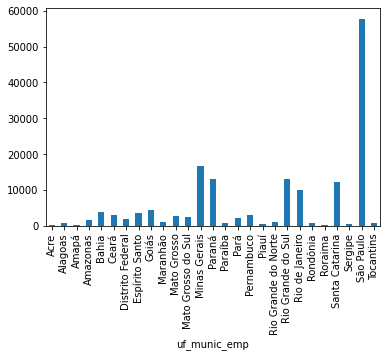

In [ ]:
uf_municipio_empregador = df_final.groupby(['uf_munic_emp'])['uf_munic_emp'].count()
uf_municipio_empregador.plot(kind = 'bar')

Aqui verifica-se que o estado com maiores empregadores que possuem registros de acidentes é o estado de SP.

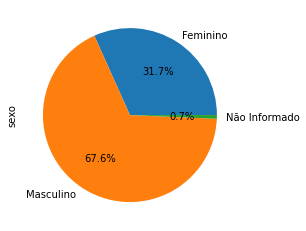

In [ ]:
filtro_acid_para = df_final['uf_munic_acidente'] == 'Pará'
df_acid_para = df_final.loc[filtro_acid_para]
df_acid_para_sexo = df_acid_para.groupby('sexo')['sexo'].count()
df_acid_para_sexo.plot(kind = 'pie', y = 'acidentes - Pará', legend=False, autopct='%1.1f%%')

Aqui notamos que a maior parte de registros de acidentes no estado do Pará são de pessoas do sexo masculino.

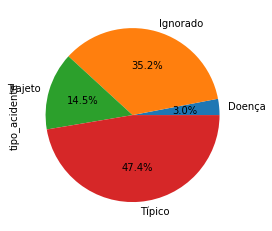

In [ ]:
acidente_por_tipo = df_final.groupby(['tipo_acidente'])['tipo_acidente'].count()
acidente_por_tipo.plot(kind = 'pie', y = 'tipo acidente', legend = False, autopct='%1.1f%%')

Aqui verifica-se que acidentes do tipo Típico são os mais comuns registrados.